In [10]:
import pandas as pd
import plotly.graph_objects as go
import duckdb
df = pd.read_csv("../data/landline-internet-subscriptions.csv")

In [11]:
df

,Entity,Code,Year,Fixed broadband subscriptions
0,Afghanistan,AFG,2004,200
1,Afghanistan,AFG,2005,220
2,Afghanistan,AFG,2006,500
3,Afghanistan,AFG,2007,500
4,Afghanistan,AFG,2008,500
...,...,...,...,...
4460,Zimbabwe,ZWE,2019,204000
4461,Zimbabwe,ZWE,2020,203000
4462,Zimbabwe,ZWE,2021,205000
4463,Zimbabwe,ZWE,2022,207000


In [36]:
import pandas as pd
import plotly.express as px
import numpy as np

# Läs in datan
df = pd.read_csv("../data/landline-internet-subscriptions.csv")

# Filtrera 2023 och rensa
df_latest = df[df["Year"] == 2023].copy()
df_latest = df_latest.dropna(subset=["Code", "Fixed broadband subscriptions"])
df_latest["log_subscriptions"] = np.log10(df_latest["Fixed broadband subscriptions"] + 1)

# Skapa karta
fig = px.choropleth(
    df_latest,
    locations="Code",
    color="log_subscriptions",
    hover_name="Entity",
    color_continuous_scale=[
        "#ffffff", "#f5e8da", "#eacda0", "#dca06b", "#c97c3c", "#a34e16", "#732400"
    ],
    title="<b>Fixed Broadband Subscriptions (2023)</b><br><sup>ITU via World Bank</sup>",
    labels={"log_subscriptions": "Log₁₀(Fixed broadband subscriptions)"}
)

# Lägg till landsgränser för att synliggöra även länder utan data
fig.update_geos(
    showcountries=True,            # Visa landsgränser
    countrycolor="lightgrey",      # Färg på gränser
    showsubunits=False,            # Visa ej delstater
    showframe=False,
    showcoastlines=False
)

# Layout
fig.update_layout(
    title_x=0.2,
    paper_bgcolor="white",
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
)

fig.show()


In [15]:
df.columns

Index(['Entity', 'Code', 'Year', 'Fixed broadband subscriptions'], dtype='object')

In [37]:
import plotly.express as px
import pandas as pd

# Skapa en exempel DataFrame
df = pd.DataFrame({
    'Land': ['Sverige', 'Norge', 'Finland'],
    'Befolkning': [10, 5, 6],
    'Yta': [450, 500, 340]
})

# Skapa ett stapeldiagram och anpassa hover-data
fig = px.bar(df, x='Land', y='Befolkning', 
             hover_data={'Land': False, 'Yta': True})  # Dölj land och visa yta vid hover

fig.show()

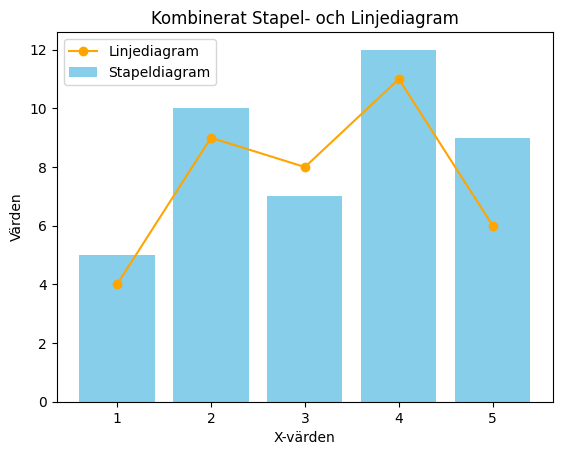

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Data för stapeldiagram och linjediagram
x = np.arange(1, 6)
bar_data = np.array([5, 10, 7, 12, 9])
line_data = np.array([4, 9, 8, 11, 6])

# Skapa en figur och axel
fig, ax = plt.subplots()

# Rita stapeldiagram
ax.bar(x, bar_data, color='skyblue', label='Stapeldiagram')

# Rita linjediagram på samma axel
ax.plot(x, line_data, color='orange', marker='o', label='Linjediagram')

# Lägg till etiketter och titel
ax.set_xlabel('X-värden')
ax.set_ylabel('Värden')
ax.set_title('Kombinerat Stapel- och Linjediagram')
ax.legend()

# Visa diagrammet
plt.show()
